## 实例：分类树在合成数集上的表现

我们将在不同结构的数据集上测试一下决策树的效果，让大家更好地理解决策树。

![](../../imgs/decisiontreeclasssify_example.webp)

In [1]:
# 导入需要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_circles, make_classification

In [2]:
# 生成三种数据集,我们先从sklearn自带的数据库中生成三种类型的数据集：
# 1）月亮型数据
# 2）环形数据
# 3）二分型数据

# make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据
                           n_redundant=0, #添加冗余特征0个
                           n_informative=2, #包含信息的特征是2个
                           random_state=1,  #随机模式1
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                          )

In [3]:
print(X[:5],X.shape, y.shape, sep='\n'*2)

[[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]
 [-0.90731836  1.06040861]]

(100, 2)

(100,)


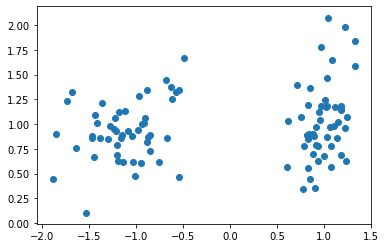

In [4]:
# X中特征的分布
plt.scatter(X[:,0], X[:,1] )

从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏

**注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会继续下降**

In [5]:
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布

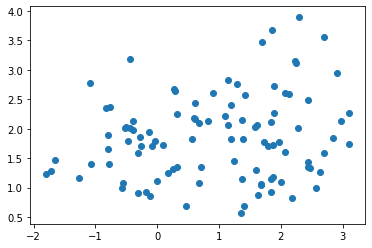

In [6]:
# X中特征的分布
plt.scatter(X[:,0], X[:,1] )

In [8]:
# 用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

### 画出三种数据集和三棵决策树的分类效应图像

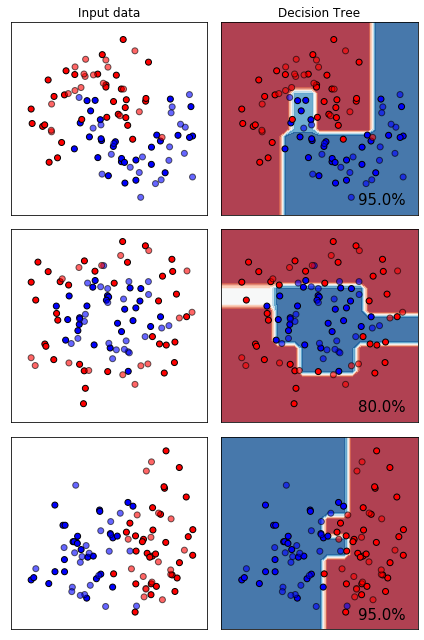

In [53]:
# 创建画布
figure = plt.figure(figsize=(6, 9))
# 设置用来安排图形显示位置的全局变量i
i=1

for ds_index, ds in enumerate(datasets):
    
    # 对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.4, random_state=42)
    
    # 找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，
    # 创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    x2_min, x2_max = X[:,1].min() - .5, X[:,1].max() + .5

    # 用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    # 函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    # 函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。(可以shift + tab查看函数例子)
    # 如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。
    # 那么生成的第一个二维数组是以narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
    # 生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                               np.arange(x2_min, x2_max, 0.2))
    
    # 接下来生成彩色画布
    # 用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    # 在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
#     plt.subplot(len(datasets), 2, i)
    
    # 到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
    # 我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
    
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, 
               cmap=cm_bright,edgecolors='k')
    #放测试集
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, 
               cmap=cm_bright, alpha=0.6,edgecolors='k')
    
    #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集
    
    #############################从这里开始是决策树模型##########################
    
    # 迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
    # 在这里，len(datasets)其实就是3，2是两列
    # 在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
    
    # 决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(Xtrain, ytrain)
    score = clf.score(Xtest, ytest)
    
    # 绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
    # 分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
    # 类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
    # 由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征
    # ravel()能够将一个多维数组转换成一维数组
    # np.c_是能够将两个数组组合起来的函数
    # np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # 在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，且出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    #将数据集的分布放到我们的坐标系上
    # 将训练集放到图中去
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=cm_bright,
               edgecolors='k')
    # 将测试集放到图中去
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    
    #为图设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    
     #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Decision Tree")
    
    #写在右下角的数字    
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
            size=15, horizontalalignment='right')
    
    #让i继续加一
    i += 1

plt.tight_layout()
plt.show()

从图上来看，每一条线都是决策树在二维平面上画出的一条决策边界，每当决策树分枝一次，就有一条线出现。当数据的维度更高的时候，这条决策边界就会由线变成面，甚至变成我们想象不出的多维图形。

同时，很容易看得出，分类树天生不擅长环形数据。每个模型都有自己的决策上限，所以一个怎样调整都无法提升表现的可能性也是有的。当一个模型怎么调整都不行的时候，我们可以选择换其他的模型使用，不要在一棵树上吊死。顺便一说，最擅长月亮型数据的是最近邻算法，RBF支持向量机和高斯过程；最擅长环形数据的是最近邻算法和高斯过程；最擅长对半分的数据的是朴素贝叶斯，神经网络和随机森林。